In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

#### LOADING DATASET

In [4]:
flank = pd.read_csv("dataset.csv")

flank.head()

,No. of Trials,Machining Parameters,Unnamed: 2,Unnamed: 3,Flank wear
0,NaN,Feed rate,Depth of cut,Speed rpm,NaN
1,NaN,mm/min,mm,NaN,NaN
2,1.0,0.7,0.5,250,0.393513
3,2.0,0.7,0.75,500,0.467263
4,3.0,0.7,1,750,0.541013


#### DATA CLEANING

In [5]:
flank = flank.rename(columns =
             {'Machining Parameters':'Feed rate',"Unnamed: 2":'Depth of cut','Unnamed: 3' : 'Speed'})

In [6]:
flank = flank.dropna()

In [7]:
flank.drop([2002], inplace = True)

In [8]:
flank.tail()

,No. of Trials,Feed rate,Depth of cut,Speed,Flank wear
1997,1996.0,1.1,0.5,282,0.961513
1998,1997.0,1,0.75,668,0.893263
1999,1998.0,0.5,0.8,888,0.198013
2000,1999.0,0.6,0.85,323,0.354763
2001,1999.0,0.5,0.8,888,0.198013


In [9]:
flank['Feed rate'] = pd.to_numeric(flank['Feed rate'], errors = 'coerce')
flank['Depth of cut'] = pd.to_numeric(flank['Depth of cut'], errors = 'coerce')
flank['Speed'] = pd.to_numeric(flank['Speed'], errors = 'coerce')
flank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 2 to 2001
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No. of Trials  2000 non-null   float64
 1   Feed rate      2000 non-null   float64
 2   Depth of cut   2000 non-null   float64
 3   Speed          2000 non-null   int64  
 4   Flank wear     2000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 93.8 KB


In [10]:
flank.head()

,No. of Trials,Feed rate,Depth of cut,Speed,Flank wear
2,1.0,0.7,0.50,250,0.393513
3,2.0,0.7,0.75,500,0.467263
4,3.0,0.7,1.00,750,0.541013
5,4.0,0.7,1.25,1000,0.614763
6,5.0,0.7,1.50,1250,0.688513


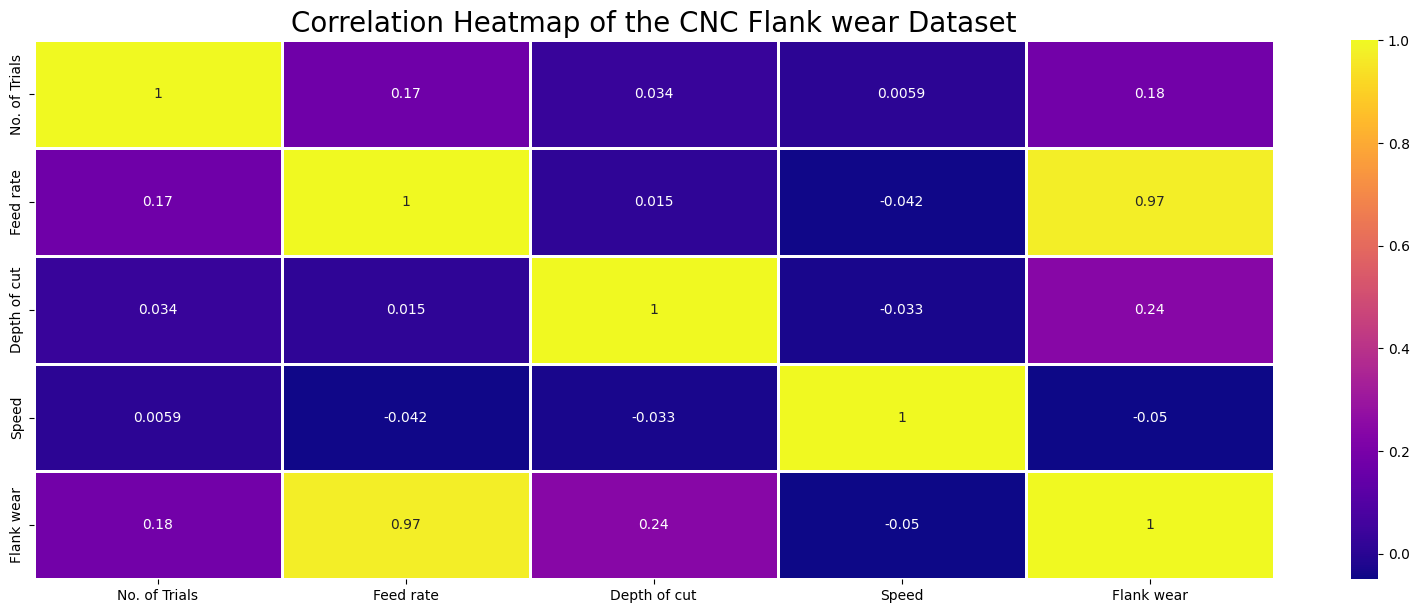

In [11]:
# Creating the heatmap
# First create a space for the heatmap and then draw the heatmap inside the space

fig, ax = plt.subplots(figsize = (20,7))

#Title for the heatmap
title = 'Correlation Heatmap of the CNC Flank wear Dataset'
plt.title(title, fontsize = 20)
ttl = ax.title

# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(flank.corr(), cbar = True, cmap = 'plasma', annot = True, linewidths = 1, ax = ax)

#enable visualization using .show() function of matplot
plt.show()

#### Defining a Multiple- Linear Regression Model

In [12]:
#defini a function multiple_linea _regression that intakes th feature,label and color of the scatter plot
def multiple_linear_regression(X,y, color):

    #importing train_test_split library
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

    #Importing statsmodel.api libray for performing multiplr linear regression analysis
    import statsmodels.api as sm
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    #Defining, fitting and printing the results of the model
    multiple_model = sm.OLS(y_train,X_train).fit()
    print(multiple_model.summary())

    #predicting the y values from the model
    predictions = multiple_model.predict(X_test)

    #importing the metrics from sklearn library.
    from sklearn import metrics
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

    #plotting a scatter plot for predictions vs actual y_value
    plt.style.use('default')
    plt.style.use('ggplot')

    fig, ax = plt.subplots(figsize=(8, 5))

    ax.scatter(y_test, predictions,s = 12,color = color,
               label='Fit between prediction vs test data')
    ax.set_ylabel('Predictions', fontsize=14)
    ax.set_xlabel('Actual y_test', fontsize=14)

    ax.legend(facecolor='white', fontsize=11)

    fig.tight_layout()

**Flank wear as a function of Feed rate and Depth of cut**

In [13]:
X = flank[['Feed rate', 'Depth of cut']]
y = flank['Flank wear']

                            OLS Regression Results                            
Dep. Variable:             Flank wear   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.774e+05
Date:                Sun, 11 Feb 2024   Prob (F-statistic):               0.00
Time:                        23:10:51   Log-Likelihood:                 3181.9
No. Observations:                1600   AIC:                            -6358.
Df Residuals:                    1597   BIC:                            -6342.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.7323      0.003   -276.126   

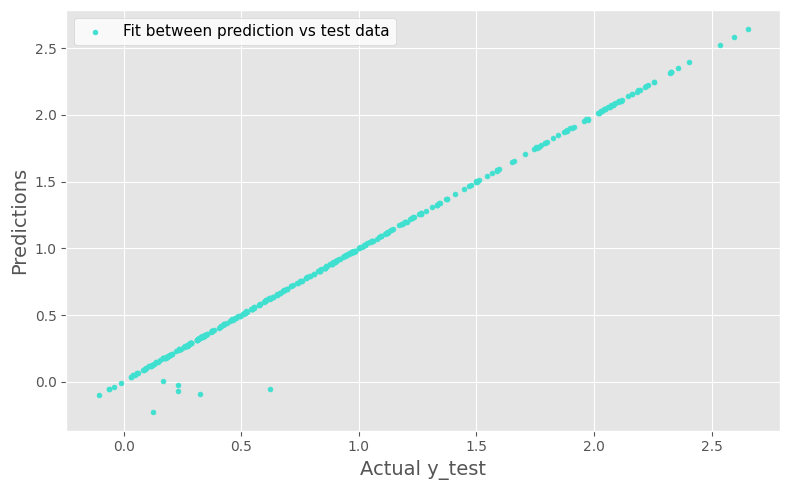

In [14]:
multiple_linear_regression(X,y, color = 'turquoise')